<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" height="200">

# Семинар 1: введение в PyTorch
</center>

В этой тетрадке решение задачек из основного семинара. 

In [1]:
import numpy as np
np.__version__

'2.0.2'

In [2]:
import torch
torch.__version__

'2.8.0+cu126'

In [3]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Задание 1:

- При помощи numpy посчитайте сумму квадратов чисел от 1 до 10000
- Сделайте то же самое с помощью pytorch

In [33]:
np.square(np.arange(1, 10_000 + 1)).sum()

np.int64(333383335000)

In [35]:
torch.square(torch.arange(1, 10_000 + 1)).sum()

tensor(333383335000)

### Задание 2:

Реализуйте на PyTorch сигмоиду

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

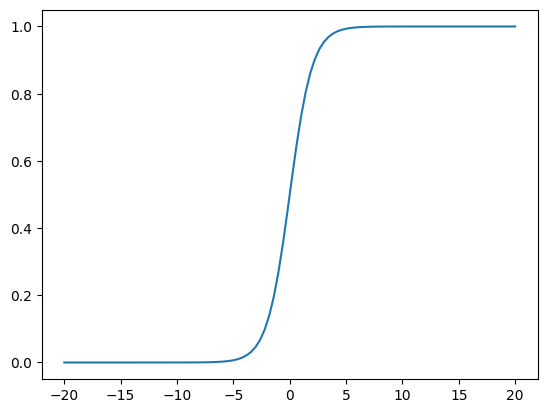

In [37]:
x = torch.linspace(-20, 20, 100)

def sigm(x):
    return 1/(1 + torch.exp(-x))

y = sigm(x)

plt.plot(x, y);

### Задание 3:

Реализуйте на PyTorch среднюю квадратичную ошибку.

$$
MSE(\hat y, y) = \frac{1}{n} \cdot \sum_{i=1}^n (\hat y - y)^2
$$

In [39]:
y_pred = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float)
y_test = torch.tensor([-1, 3, 4, 6, -5], dtype=torch.float)

def mse(y_true, y_pred):
    return torch.mean((y_true - y_pred)**2)

z = mse(y_test, y_pred)
z.item()

22.0

### Задание 4:

Что будет в переменной `x` в результате выполнения следующего кода? Почему?

In [40]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = x
y[2] = torch.ones(3)

print(y)
print('')
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])


Как это можно исправить?

In [42]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = x.clone()
y[2] = torch.ones(3)

print(y)
print('')
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Задание 5:

Реализуйте расчёт градиента для функции

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7)
$$

в точке `w = [[5,10], [1,2]]`

In [63]:
# ваш код
w =  torch.tensor([[5.,10.],[1.,2.]], requires_grad=True)

function =  torch.prod(torch.log(torch.log(w + 7)))
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


### Задание 6:

Решите задачу

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) \to \min_{w}
$$

с помощью градиентного спуска. Выведите минимальное значение.

In [75]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -= alpha * w.grad
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


### Задание 7:

Напишите `DataLoader` для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла.

В обучающей выборке данные должны перемешиваться каждую эпоху. Размер батча поставьте равным 64. В тестовой выборке данные перемешивать не надо.

In [94]:
# берем датасет, перемешиваем его и формируем батчи
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=64, shuffle=False
)

In [95]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


### Задание 8:

Напишите  двухслойную полносвязную нейросеть. Выходной слой должен состоять из $10$ нейронов.

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=hidden_size, bias=False),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_size, out_features=num_classes),
        )

    def forward(self, x):
        return self.model(x)